## Black Scholes : Delta and Higher Order Edging
Ismael Oulkhir


Mail: oulkhir.ismael@gmail.com

LinkedIn: https://www.linkedin.com/in/ismail-oulkhir/


In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

Delta hedging is a dynamic trading strategy used to reduce or eliminate the risk associated with price movements in the underlying asset of an option. While delta hedging is effective in theory, it works well **only for small changes in the underlying price and over short time periods** due to several practical and theoretical limitations. Here's why:

---

### 1. **Delta is a Linear Approximation**
   - Delta ($ \Delta $) measures the sensitivity of the option price to small changes in the underlying asset price. It is the first-order derivative of the option price with respect to the underlying price.
   - However, the relationship between the option price and the underlying price is **non-linear** (convex for calls and concave for puts). Delta only provides a **linear approximation** of this relationship.
   - For **large changes** in the underlying price, the linear approximation breaks down, and higher-order Greeks (e.g., gamma, which measures the curvature of the option price) become significant. This means delta hedging alone is insufficient to fully hedge the option's price changes.

---

### 2. **Gamma Risk (Curvature Risk)**
   - Gamma ($ \Gamma $) measures the rate of change of delta with respect to changes in the underlying price. It captures the **curvature** of the option price.
   - When gamma is large, delta changes rapidly as the underlying price moves. This means the delta hedge needs to be **frequently adjusted** to remain effective.
   - For large price movements, gamma causes the delta hedge to become outdated quickly, leading to hedging errors. This is why delta hedging works best for **small price changes** and over **short time periods**, where gamma effects are less pronounced.

### 3. **Transaction Costs and Practical Constraints**
   - Delta hedging requires **frequent rebalancing** of the hedge portfolio to maintain a delta-neutral position. This involves buying or selling the underlying asset as the delta changes.
   - In practice, frequent trading incurs **transaction costs** (e.g., bid-ask spreads, commissions), which can erode the effectiveness of the hedge.
   - Additionally, in illiquid markets, it may be difficult to execute trades quickly and at fair prices, further limiting the effectiveness of delta hedging.

---

### 4. **Discrete Hedging vs. Continuous Hedging**
   - The Black-Scholes model assumes **continuous hedging**, meaning the hedge is adjusted continuously as the underlying price changes. In reality, hedging is done at **discrete intervals** (e.g., daily or hourly).
   - Discrete hedging introduces **hedging errors** because the hedge is not adjusted continuously. These errors accumulate over time, especially for large price movements or longer time horizons.

---

### 5. **Higher-Order Greeks**
   - Delta hedging only accounts for first-order price risk (delta). For large price movements or longer time periods, **higher-order Greeks** (e.g., gamma, vega, theta) become significant.
   - To fully hedge an option, one would need to account for these higher-order risks, which requires more complex hedging strategies (e.g., gamma hedging, vega hedging).

[*********************100%***********************]  1 of 1 completed


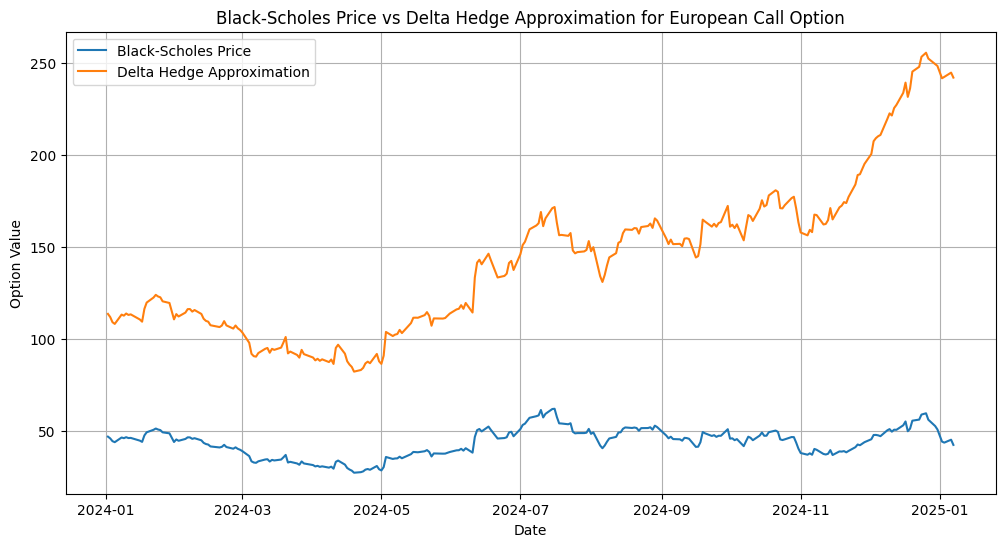

In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

# Black-Scholes formula for a European call option
def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Black-Scholes delta for a European call option
def black_scholes_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Download TSLA data
ticker = "AAPL"
data = yf.download(ticker, start="2024-01-01", end="2025-01-08")
prices = data['Close']

# Option parameters
K = 200  # Strike price
T = 1.0  # Time to maturity (1 year)
r = 0.0477  # Risk-free rate (5%)
sigma = 0.67  # Volatility (30%)

# Initialize lists to store results
black_scholes_prices = []
delta_approx_prices = []
S0=prices.iloc[0] # initial stock price
# Loop through each day in the data
for i in range(len(prices)):
    S = prices.iloc[i]  # Current stock price
    t = (len(prices) - i) / 252  # Remaining time to maturity (in years)
    
    # Compute Black-Scholes price
    bs_price = black_scholes(S, K, t, r, sigma)
    black_scholes_prices.append(bs_price)
    
    # Compute delta hedge approximation
    delta = black_scholes_delta(S, K, t, r, sigma)
    delta_approx_price = delta * S 
    delta_approx_prices.append(delta_approx_price)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(prices.index, black_scholes_prices, label='Black-Scholes Price')
plt.plot(prices.index, delta_approx_prices, label='Delta Hedge Approximation')
plt.title('Black-Scholes Price vs Delta Hedge Approximation for European Call Option')
plt.xlabel('Date')
plt.ylabel('Option Value')
plt.legend()
plt.grid()
plt.show()

## Replicating Straddle using 2 European Call Options ; long position in Bonds and short position in Stocks

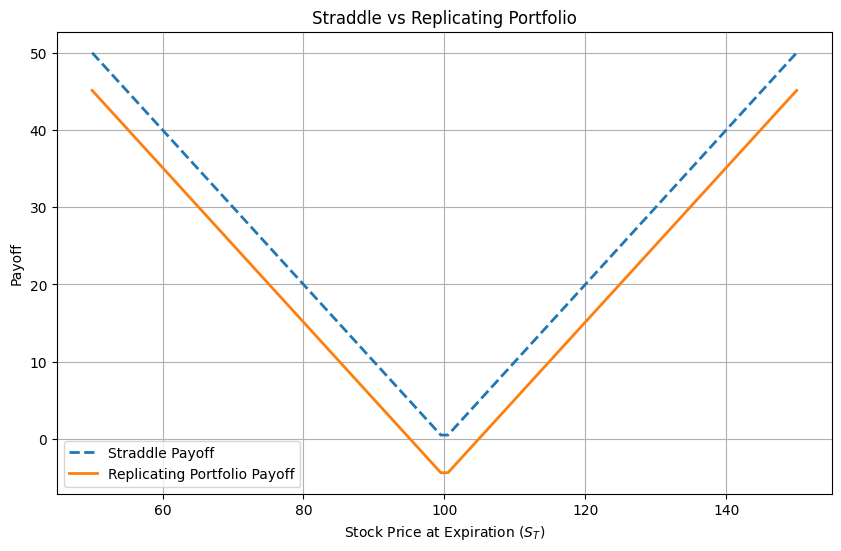

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S = 100  # Current stock price
K = 100  # Strike price
r = 0.05  # Risk-free rate
T = 1.0  # Time to maturity (1 year)
sigma = 0.2  # Volatility

# Range of stock prices at expiration
S_T = np.linspace(50, 150, 100)

# Payoff of the straddle
straddle_payoff = np.maximum(S_T - K, 0) + np.maximum(K - S_T, 0)

# Replicating portfolio
# 1. Buy 2 European call options
call_payoff = 2 * np.maximum(S_T - K, 0)

# 2. Short 1 share of stock
stock_payoff = -S_T

# 3. Buy K * e^(-rT) worth of bonds
bond_payoff = K * np.exp(-r * T)

# Total replicating portfolio payoff
replicating_portfolio_payoff = call_payoff + stock_payoff + bond_payoff

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(S_T, straddle_payoff, label='Straddle Payoff', linestyle='--', linewidth=2)
plt.plot(S_T, replicating_portfolio_payoff, label='Replicating Portfolio Payoff', linestyle='-', linewidth=2)
plt.title('Straddle vs Replicating Portfolio')
plt.xlabel('Stock Price at Expiration ($S_T$)')
plt.ylabel('Payoff')
plt.legend()
plt.grid()
plt.show()